<a href="https://colab.research.google.com/github/CheyQ27/Sales_Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 
- Cheyenne Quann
-04/29/2022

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo/DataSets/sales_predictions.csv'

In [87]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [88]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3)  Are there duplicates? If so, drop any duplicates.

In [90]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [91]:
df.duplicated().sum()

0

4) Identify missing values.

In [92]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [93]:
# Item weight column will be deleted because there is no usable pattern to be found in the random weights of items.
# The information we lose by losing that column is minimal 
# I also don't believe filling in the blacks will assist me because the items missing weight show no obvious patterns
# The item types are too different for that column to be important
df.drop(columns=['Item_Weight'], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [94]:
#I'm going to attempt to fill in the missing Outlet_Size values due to the fact that there are only 3 potential values
# I do not think my data will suffer if I average all the values and fill in for one forth of my data
df['Outlet_Size'].fillna('missing', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

6) Confirm that there are no missing values after addressing them

In [95]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [97]:
df.value_counts()

Item_Identifier  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV28            Regular           0.000000         Frozen Foods           35.1558   OUT017             2007                       missing      Tier 2                Supermarket Type1  339.5580             1
FDV32            Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       missing      Tier 2                Supermarket Type1  1328.2710            1
                                   0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Medium       Tier 3                Superma

In [98]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [99]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [100]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


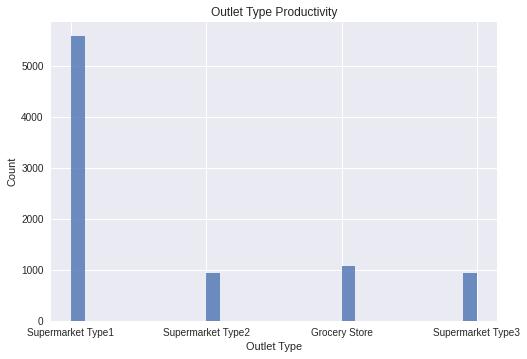

In [101]:
plt.style.use('seaborn')
OType = df['Outlet_Type'];
plt.hist(OType, label= 'Outlet Type', alpha=.8, bins = 30);
plt.title('Outlet Type Productivity')
plt.ylabel('Count')
plt.xlabel('Outlet Type');
#Type 1 outlets seem to produce more

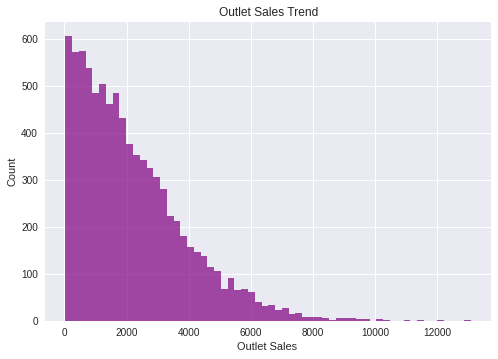

In [102]:
OSales = df['Item_Outlet_Sales'];
plt.hist(OSales, label= 'Outlet Sales', alpha=0.7, bins = 60, color='purple');
plt.title('Outlet Sales Trend')
plt.ylabel('Count')
plt.xlabel('Outlet Sales ');
#Majority of the stores do not sell as much product

In [103]:
corr = df.corr()

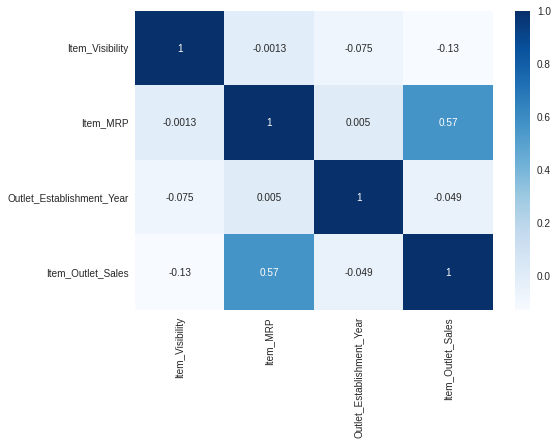

In [104]:
sns.heatmap(corr,cmap= 'Blues', annot = True);
#There is an extremely low to negative correlation in every category with the exception of Item_Outlet_Sales and Item_MRP

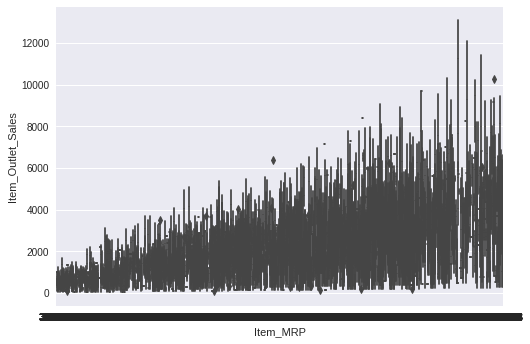

In [105]:
#I really didn't understand this weeks assignments, but I tried 
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_MRP');